<a href="https://colab.research.google.com/github/Mnikito/4016/blob/main/HW1/HW1_Together.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Homework 1    Problem 1

import torch

In [3]:
import imageio
from PIL import Image
import torchvision.transforms as transforms

# 1b Load Images and Convert to Tensor
#Red Images
img_arr  = imageio.imread("/content/drive/MyDrive/4106/HW1/red1.jpg")
img_arr2 = imageio.imread("/content/drive/MyDrive/4106/HW1/red2.jpg")
img_arr3 = imageio.imread("/content/drive/MyDrive/4106/HW1/red3.jpg")

#Green Images
img_arr4 = imageio.imread("/content/drive/MyDrive/4106/HW1/green1.jpg")
img_arr5 = imageio.imread("/content/drive/MyDrive/4106/HW1/green2.jpg")
img_arr6 = imageio.imread("/content/drive/MyDrive/4106/HW1/green3.jpg")

#Blue Images
img_arr7  = imageio.imread("/content/drive/MyDrive/4106/HW1/blue1.jpg")
img_arr8 = imageio.imread("/content/drive/MyDrive/4106/HW1/blue2.jpg")
img_arr9 = imageio.imread("/content/drive/MyDrive/4106/HW1/blue3.jpg")

# Define transform to convert the image to PyTorch Tensor
transform = transforms.ToTensor()

# Convert image to PyTorch Tensor (Image Tensor)
#Red
img_t = transform(img_arr)
img_t2 = transform(img_arr2)
img_t3 = transform(img_arr3) 

#Green
img_t4 = transform(img_arr4)
img_t5 = transform(img_arr5)
img_t6 = transform(img_arr6)

#Blue 
img_t7 = transform(img_arr7)
img_t8 = transform(img_arr8)
img_t9 = transform(img_arr9)

In [4]:
# Finding average of each color
#Red
r1_brightness = torch.mean(img_t)
r2_brightness = torch.mean(img_t2)
r3_brightness = torch.mean(img_t3)
r1_data = torch.mean(img_t, dim =[1,2])
r2_data = torch.mean(img_t2,dim =[1,2])
r3_data = torch.mean(img_t3,dim =[1,2])

#Green
g1_brightness = torch.mean(img_t4)
g2_brightness = torch.mean(img_t5)
g3_brightness = torch.mean(img_t6)
g1_data = torch.mean(img_t4,dim =[1,2])
g2_data = torch.mean(img_t5,dim =[1,2])
g3_data = torch.mean(img_t6,dim =[1,2])

#Blue
b1_brightness = torch.mean(img_t7)
b2_brightness = torch.mean(img_t8)
b3_brightness = torch.mean(img_t9)
b1_data = torch.mean(img_t7, dim =[1,2])
b2_data = torch.mean(img_t8, dim =[1,2])
b3_data = torch.mean(img_t9, dim =[1,2])

In [5]:
# Printing Each One
#Red Brightness
print("\nRed Photo Brightnesses")
print(r1_brightness)
print(r2_brightness)
print(r3_brightness)
#Red Colors
print("\nRed Photo Mean Values")
print(r1_data)
print(r2_data)
print(r3_data)

#Green Brightness
print("\nGreen Photo Brightnesses")
print(g1_brightness)
print(g2_brightness)
print(g3_brightness)

#Green Colors
print("\nGreen Photo Mean Values")
print(g1_data)
print(g2_data)
print(g3_data)

#Blue Brightness
print("\nBlue Photo Brightnesses")
print(b1_brightness)
print(b2_brightness)
print(b3_brightness)

#Blue
print("\nBlue Photo Mean Values")
print(b1_data)
print(b2_data)
print(b3_data)


Red Photo Brightnesses
tensor(0.4349)
tensor(0.3794)
tensor(0.3779)

Red Photo Mean Values
tensor([0.6617, 0.3274, 0.3156])
tensor([0.7598, 0.1817, 0.1968])
tensor([0.7432, 0.1882, 0.2023])

Green Photo Brightnesses
tensor(0.5279)
tensor(0.5480)
tensor(0.6202)

Green Photo Mean Values
tensor([0.6329, 0.6296, 0.3213])
tensor([0.6340, 0.6382, 0.3720])
tensor([0.4649, 0.7379, 0.6576])

Blue Photo Brightnesses
tensor(0.6384)
tensor(0.4861)
tensor(0.5912)

Blue Photo Mean Values
tensor([0.6715, 0.6361, 0.6075])
tensor([0.4523, 0.5210, 0.4848])
tensor([0.5956, 0.5990, 0.5789])


In [6]:
# HW 1 Problem 2
# Modified Temperature Prediction Model

In [7]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim
torch.set_printoptions(edgeitems=2, linewidth=75)

t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0,
                    3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])

t_un = 0.1 * t_u

In [8]:
############################################
# Changes start here
############################################

def model(t_u, w2, w1, b):
    return w2 * t_u ** 2 + w1 * t_u + b

In [9]:
# Loss Function
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [10]:
# Parameters
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-4
optimizer = optim.SGD([params], lr=learning_rate)

In [11]:
# Training Loop
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
       
        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [12]:
# Running Training
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=learning_rate)
params = training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params,
    t_u = t_un, # <2> 
    t_c = t_c)

Epoch 500, Loss 10.708596
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123478
Epoch 2500, Loss 5.377227
Epoch 3000, Loss 4.845286
Epoch 3500, Loss 4.465788
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000802
Epoch 5000, Loss 3.861744


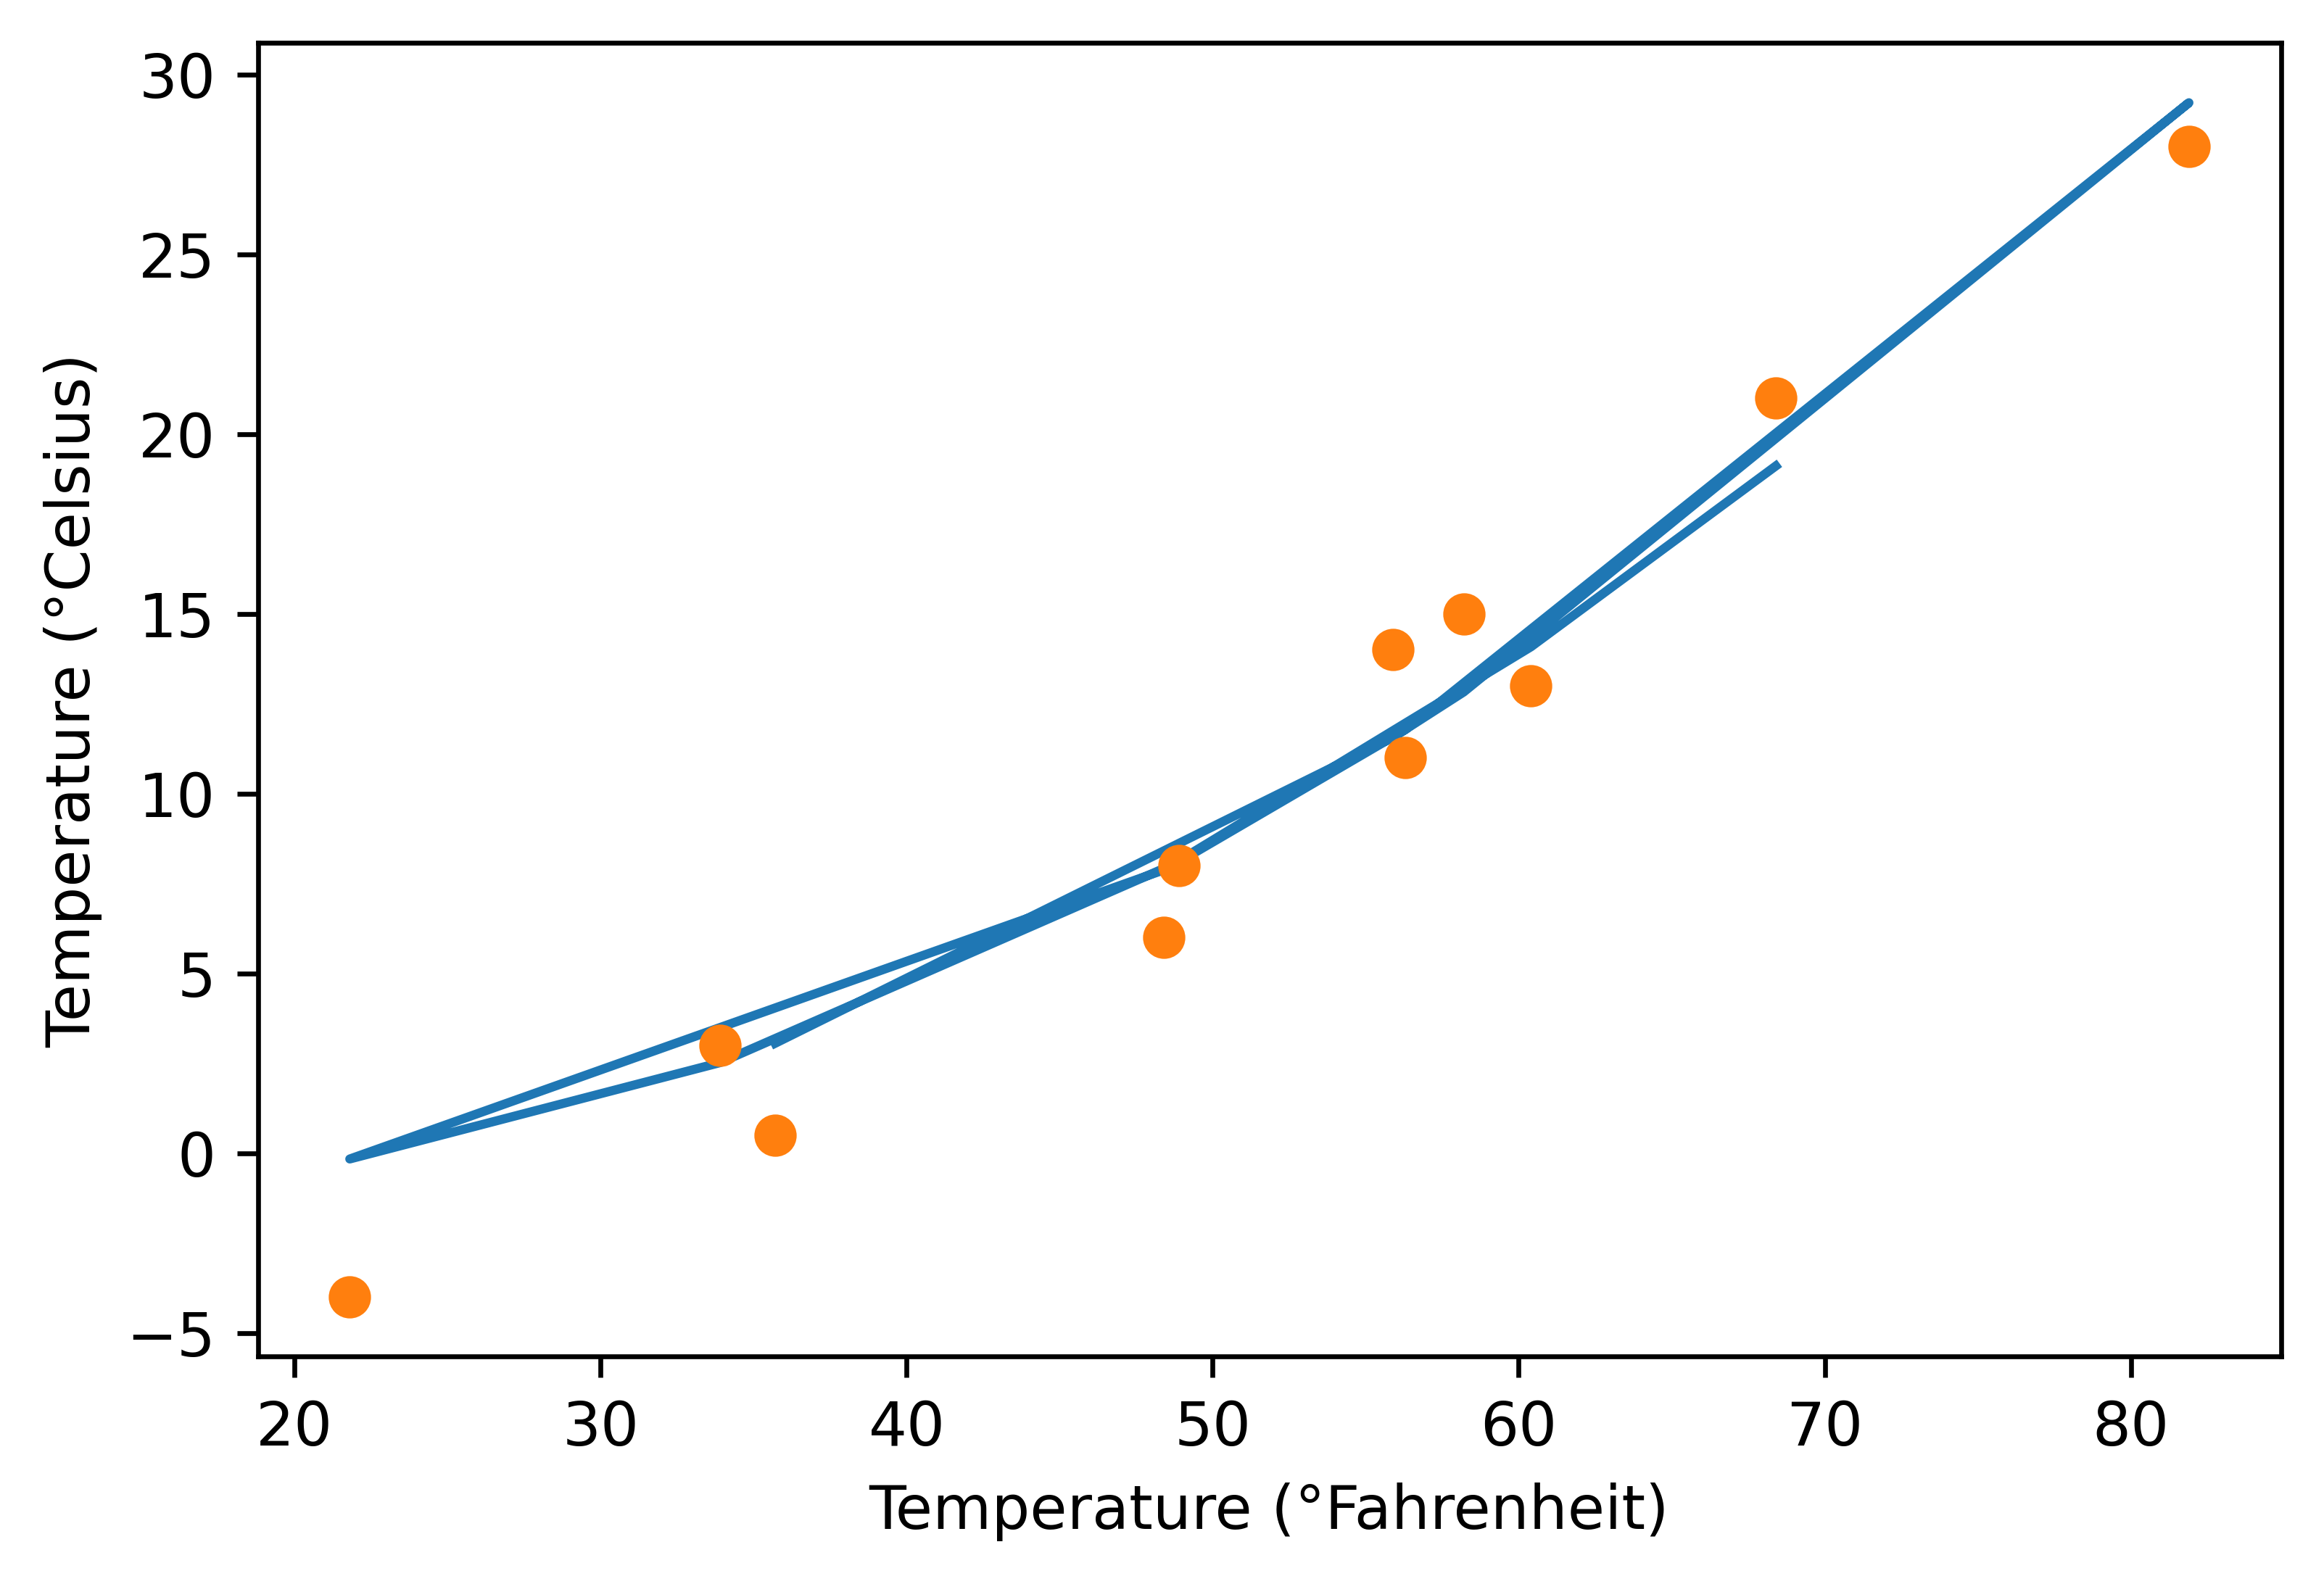

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, *params)  # <1>

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [14]:
################################################################################################################################
#Problem 3
################################################################################################################################

In [15]:
import imageio
import torch
from PIL import Image
from torchvision import transforms
import numpy as np
from matplotlib import pyplot as plt

In [16]:
#Reading training data
import pandas as pd
housing = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/4106/HW1/Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [17]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price'] 
Newtrain = housing[num_vars] 
Newtrain.head() 

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [18]:
def model(t_area, t_bedrooms, t_bathrooms, t_stories, t_parking, w1, w2, w3, w4, w5, b):
    return w5*t_parking + w4*t_stories + w3*t_bathrooms + w2*t_bedrooms + w1*t_area + b

In [19]:
#Price Predicition
t_area = torch.tensor(Newtrain['area'])
t_bedrooms = torch.tensor(Newtrain['bedrooms'])
t_bathrooms = torch.tensor(Newtrain['bathrooms'])
t_stories = torch.tensor(Newtrain['stories'])
t_parking = torch.tensor(Newtrain['parking'])
t_price = torch.tensor(Newtrain['price'])
#Normalization
t_areaN = t_area * 0.1
t_bedroomsN = t_bedrooms * 0.1
t_bathroomsN = t_bathrooms * 0.1
t_storiesN = t_stories * 0.1
t_parkingN = t_parking * 0.1

In [20]:
#Calculating the loss
def loss_fn(t_p, t_price):
    squared_diffs = (t_p - t_price)**2
    return squared_diffs.mean()

In [21]:
params = torch.tensor([1.0,1.0,1.0,1.0,1.0,0.0], requires_grad=True)

In [22]:
# Training Loop
def training_loop(n_epochs, learning_rate, params, t_area, t_bedrooms, t_bathrooms, t_stories, t_parking, t_price):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  # <1>
            params.grad.zero_()
        
        t_p = model(t_area, t_bedrooms, t_bathrooms, t_stories, t_parking, *params) 
        loss = loss_fn(t_p, t_price)
        loss.backward()
        
        with torch.no_grad():  # <2>
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [23]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-6, 
    params = torch.tensor([1.0,1.0,1.0,1.0,1.0,0.0], requires_grad=True), # <1> 
    t_area = t_areaN,
    t_bedrooms = t_bedroomsN,
    t_bathrooms = t_bathroomsN,
    t_stories = t_storiesN,
    t_parking = t_parkingN,
    t_price = t_price)

Epoch 500, Loss 3346414436352.000000
Epoch 1000, Loss 3346076794880.000000
Epoch 1500, Loss 3345739153408.000000
Epoch 2000, Loss 3345402036224.000000
Epoch 2500, Loss 3345065181184.000000
Epoch 3000, Loss 3344728064000.000000
Epoch 3500, Loss 3344390946816.000000
Epoch 4000, Loss 3344054353920.000000
Epoch 4500, Loss 3343717761024.000000
Epoch 5000, Loss 3343381430272.000000


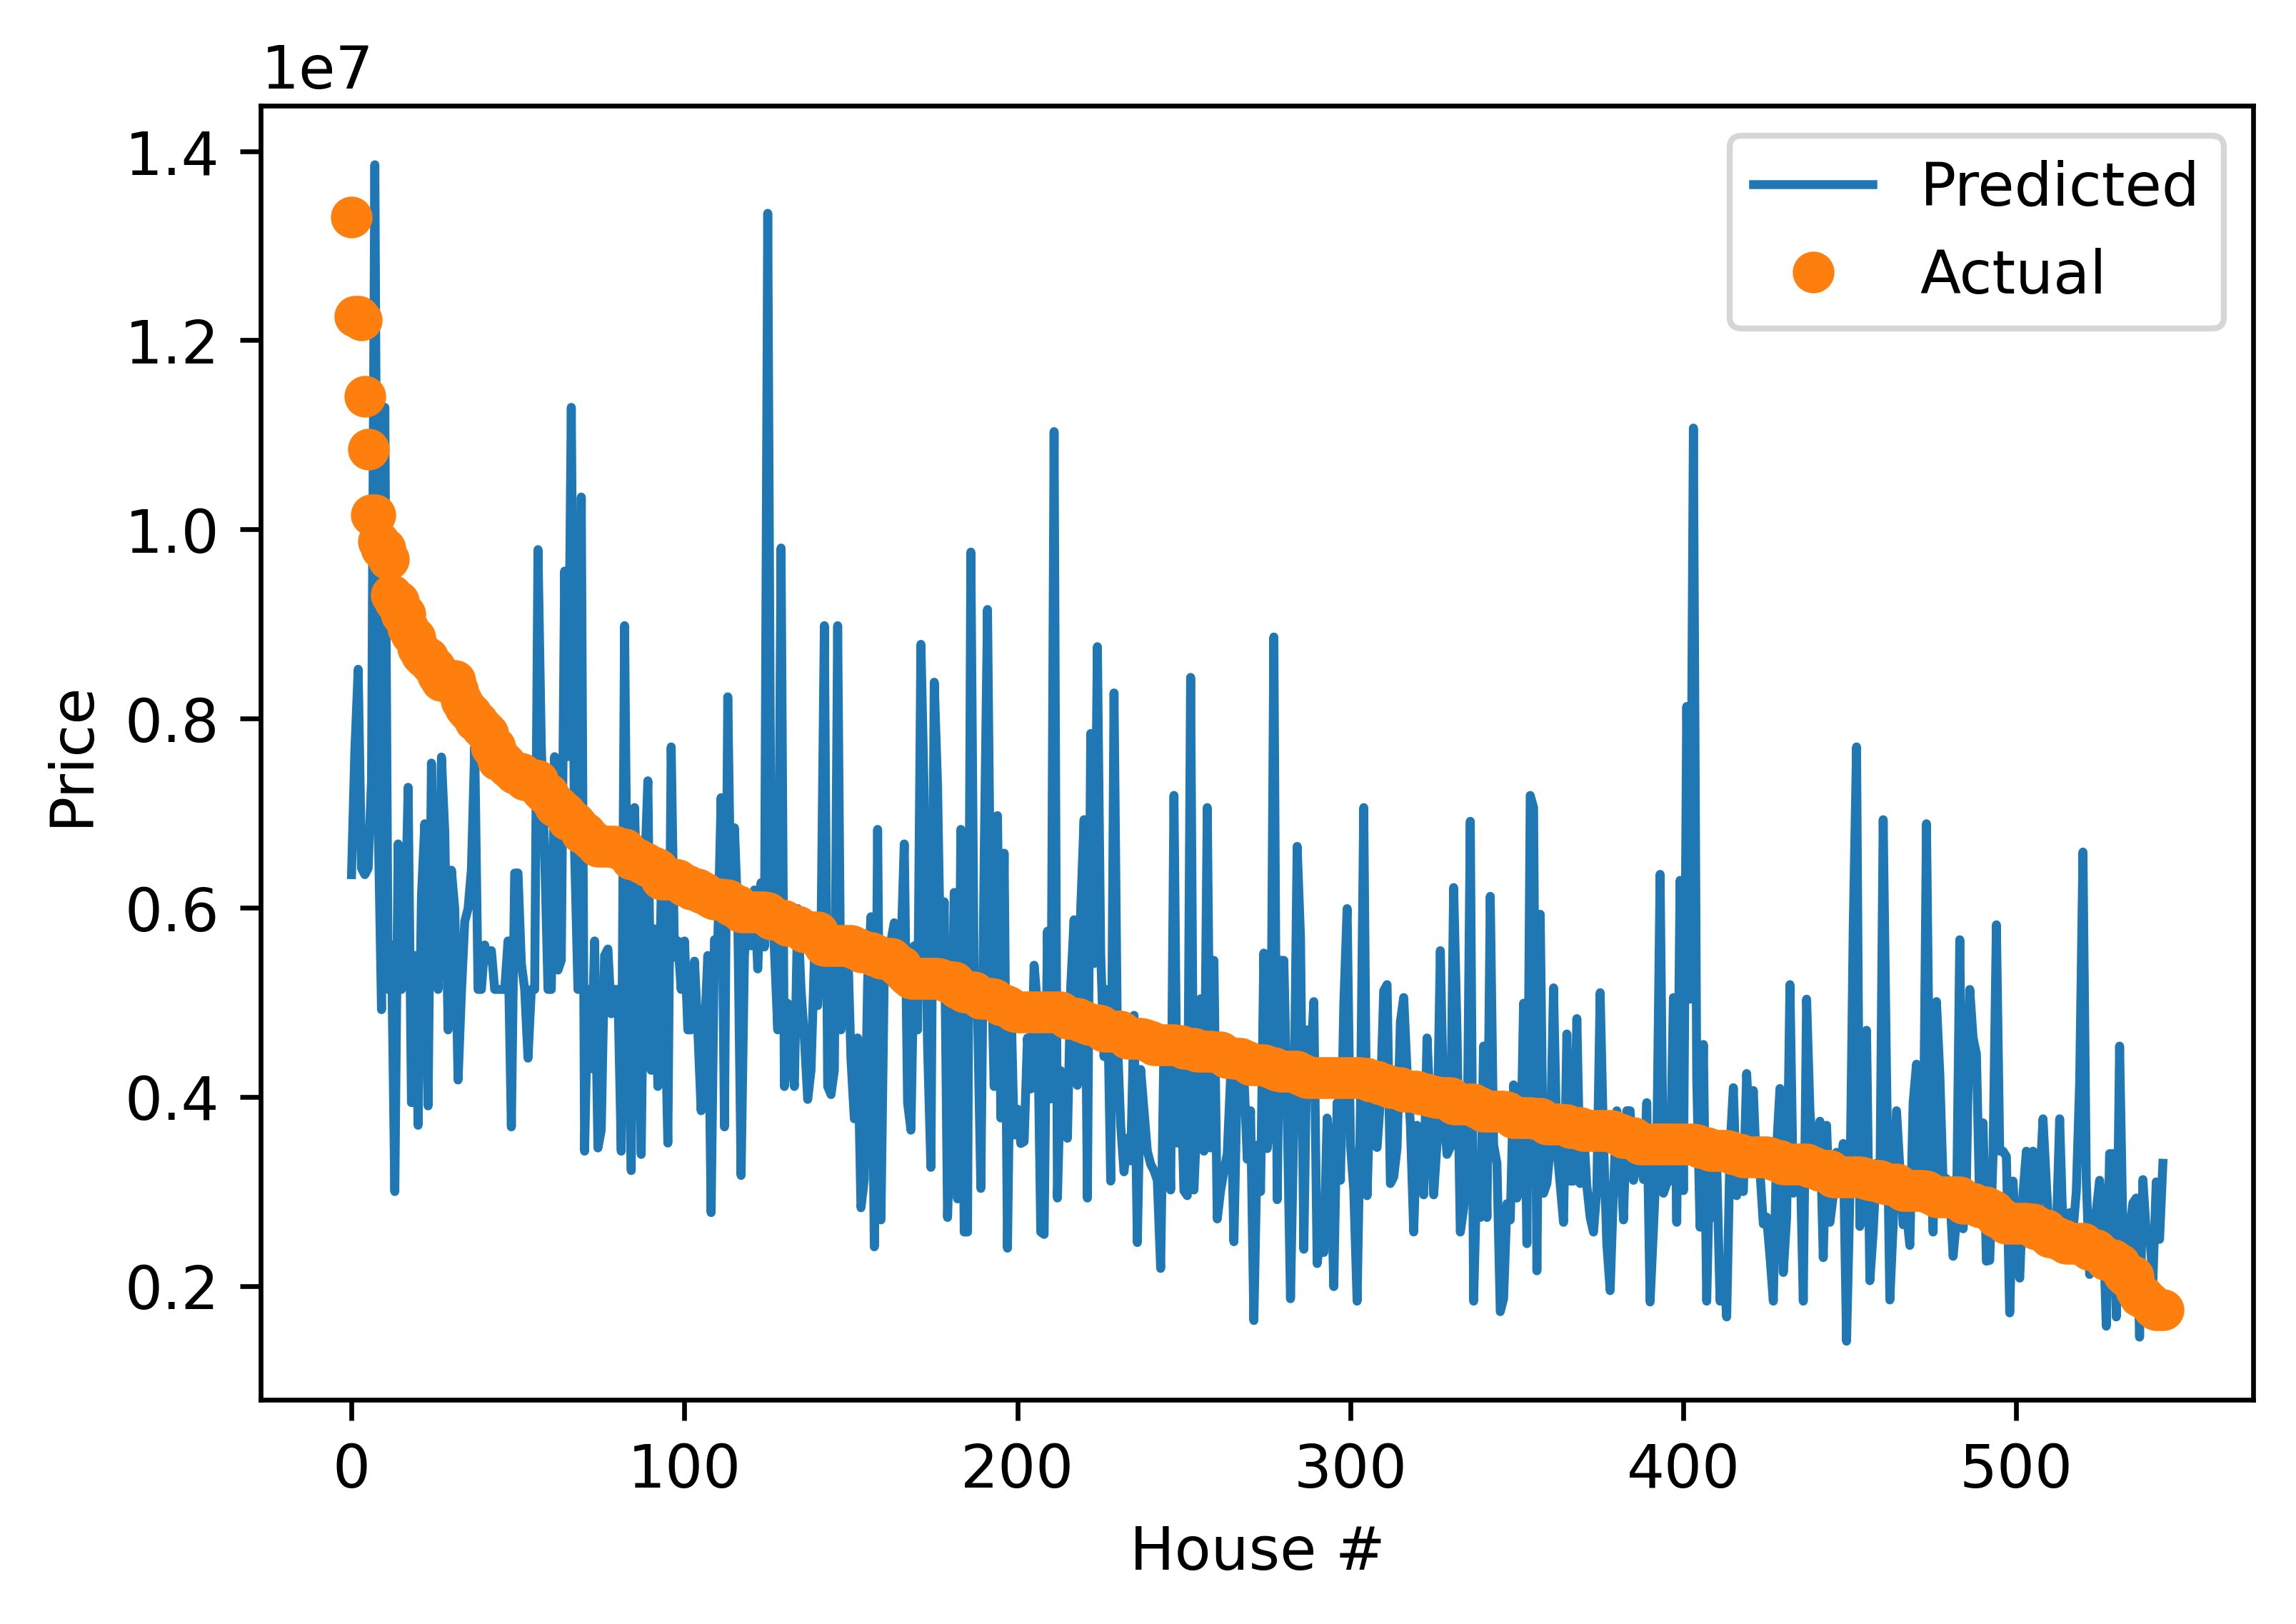

In [26]:
%matplotlib inline
t_p = model(t_areaN, t_bedroomsN, t_bathroomsN, t_storiesN, t_parkingN, *params)
fig = plt.figure(dpi=600)
plt.xlabel("House #")
plt.ylabel("Price")
plt.plot(t_p.detach().numpy())
plt.plot(t_price.numpy(), 'o')
plt.legend(['Predicted', 'Actual'])

In [27]:
#This line is for creating the pdf
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('HW1-Together.ipynb')